Epoch 1/3, Loss: 3.1225, Accuracy: 0.1203, Val Loss: 3.0893, Val Accuracy: 0.1264
Epoch 2/3, Loss: 3.0579, Accuracy: 0.1263, Val Loss: 3.0260, Val Accuracy: 0.1316
Epoch 3/3, Loss: 2.9954, Accuracy: 0.1314, Val Loss: 2.9630, Val Accuracy: 0.1376
Test Loss: 2.9630, Test Accuracy: 0.1376


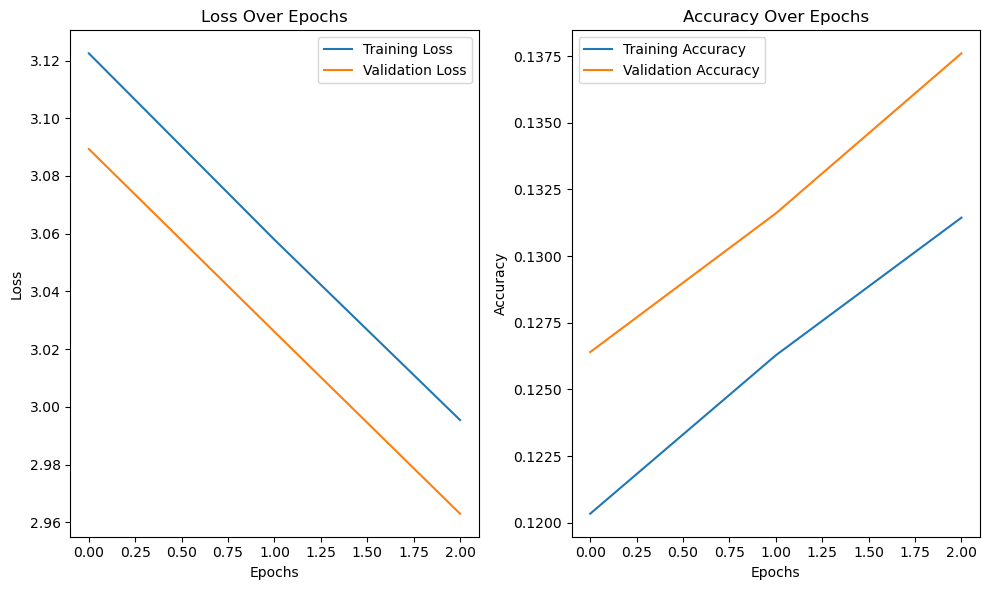

In [5]:
import sys
import numpy as np
sys.path.insert(1, "...IN3063_Group_1")

from task_1.core_NN_implementation.fullyConnetedNN2 import fullyConnectedNN
from task_1.dataset.datasetLoader import load_cifar10

#dataset directory
data_dir = "../dataset/cifar-10-batches-py"

X_train, y_train, X_test, y_test = load_cifar10(data_dir)

#Preprocess the data
X_train = X_train / 255.0  
X_test = X_test / 255.0

#Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#One-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

#parameters for the neural network
hidden_layers = [512, 256] 
activations = ['relu', 'relu', 'softmax'] 
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,  
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization
)

#Train the Model
history = model.train(
    X_train_flat, y_train_one_hot,
    epochs=3,
    batch_size=64,  
    X_val=X_test_flat, y_val=y_test_one_hot  
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)


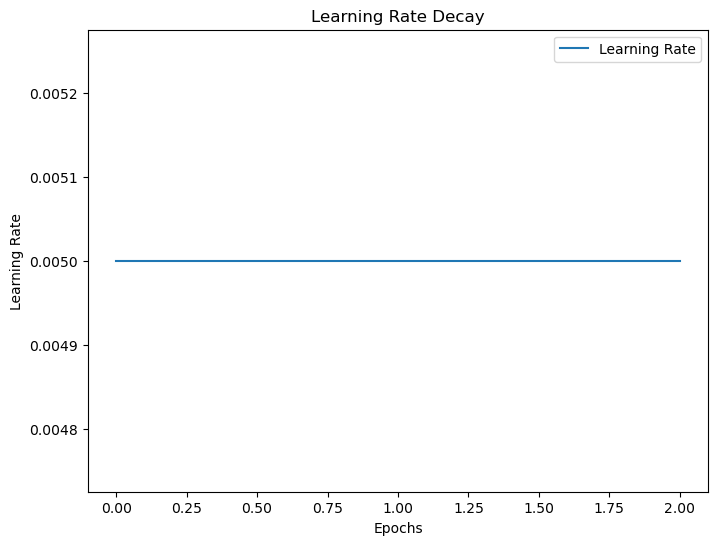

In [6]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])